In [1]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 
from dateutil.relativedelta import *
import datetime, time

In [2]:
company = '한국화장품'

In [3]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,asset_1000_,debt_1000_,sales_1000_,adjusted_price,volumne_mean_5d__week_,volumne_week_,adjusted_BPS,adjusted_EPS,_change_kospi_vol,_change_korean_bond,...,usd_krw_mean3,cny_krw_mean3,china_per_korea,us_x_ch,china_come,profit_std5,kospivol_std5,ko_bond_std5,usd_krw_std5,cny_krw_mean5
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,69121151.0,27844861.0,24673457.0,12300.0,435176.0,324524.0,2569.05,-196.19,11.85,0.94,...,NaN,NaN,609.096191,1.390896e+06,1.760723e+09,NaN,NaN,NaN,NaN,NaN
2015-09-02,69121151.0,27844861.0,24673457.0,12600.0,361751.0,264220.0,2569.05,-196.19,1.40,-2.83,...,NaN,NaN,622.564879,1.395877e+06,1.760723e+09,NaN,NaN,NaN,NaN,NaN
2015-09-03,69121151.0,27844861.0,24673457.0,12700.0,252166.0,243365.0,2569.05,-196.19,-8.88,-0.05,...,1182.908333,1182.908333,629.762757,1.411083e+06,1.760723e+09,NaN,NaN,NaN,NaN,NaN
2015-09-04,69121151.0,27844861.0,24673457.0,11800.0,228455.0,158360.0,2569.05,-196.19,11.42,-2.49,...,1188.196667,1188.196667,642.595430,1.428569e+06,1.760723e+09,NaN,NaN,NaN,NaN,NaN
2015-09-07,69121151.0,27844861.0,24673457.0,11900.0,245916.0,239112.0,2569.05,-196.19,6.16,-0.05,...,1195.264167,1195.264167,654.161001,1.446427e+06,1.760723e+09,0.0,1.293324,0.037317,9.695803,9.695803


In [4]:
data = data.reset_index()
data.Date = pd.to_datetime(data.Date)
data = data.set_index("Date")

In [5]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [6]:
event_new = pd.read_excel(f"event_embbed_with_tech_no_{company}.xlsx", index_col = 0)
data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)
data = data.reset_index()
data['Date'] = pd.to_datetime(data.Date)
event_new.rename(columns = {'date' : 'Date'}, inplace=True)
data = pd.merge(data, event_new[[f'event{i}' for i in range(1, 17)] + ['Date']], on=['Date'], how='left')
data = data.set_index(['Date'])
data.head()

,asset_1000_,debt_1000_,sales_1000_,adjusted_price,volumne_mean_5d__week_,volumne_week_,adjusted_BPS,adjusted_EPS,_change_kospi_vol,_change_korean_bond,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,69121151.0,27844861.0,24673457.0,12300.0,435176.0,324524.0,2569.05,-196.19,11.85,0.94,...,-0.092701,-0.069244,0.197857,0.174763,0.208843,0.144781,0.081664,0.146348,0.121402,0.100723
2015-09-02,69121151.0,27844861.0,24673457.0,12600.0,361751.0,264220.0,2569.05,-196.19,1.40,-2.83,...,-0.190703,-0.171176,0.120704,0.116483,0.132819,0.074534,0.015769,0.082790,0.055652,0.034292
2015-09-03,69121151.0,27844861.0,24673457.0,12700.0,252166.0,243365.0,2569.05,-196.19,-8.88,-0.05,...,-0.136005,-0.119861,0.119555,0.108042,0.127290,0.062522,0.009557,0.074797,0.044964,0.026090
2015-09-04,69121151.0,27844861.0,24673457.0,11800.0,228455.0,158360.0,2569.05,-196.19,11.42,-2.49,...,0.034332,0.056842,0.264833,0.275743,0.272733,0.218362,0.158821,0.239412,0.194108,0.172969
2015-09-07,69121151.0,27844861.0,24673457.0,11900.0,245916.0,239112.0,2569.05,-196.19,6.16,-0.05,...,-0.024529,-0.007989,0.254676,0.257442,0.258751,0.200804,0.159495,0.224511,0.183279,0.173228


In [7]:
data.tail()

,asset_1000_,debt_1000_,sales_1000_,adjusted_price,volumne_mean_5d__week_,volumne_week_,adjusted_BPS,adjusted_EPS,_change_kospi_vol,_change_korean_bond,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-23,81307960.2,46114503.7,29324609.54,11200.0,2368828.0,2021601.0,2190.48,-445.25,6.80,-0.81,...,-0.331894,-0.315463,0.362671,0.368812,0.371296,0.311456,0.267204,0.327438,0.293399,0.280156
2019-12-24,81307960.2,46114503.7,29324609.54,10300.0,2408223.0,1296496.0,2190.48,-445.25,-1.15,-0.82,...,-0.257485,-0.236019,0.522403,0.501331,0.512631,0.475270,0.409992,0.460607,0.444585,0.447698
2019-12-26,81307960.2,46114503.7,29324609.54,10750.0,2606370.0,3727974.0,2190.48,-445.25,2.46,0.68,...,-0.150105,-0.136175,0.255187,0.227207,0.264742,0.202433,0.146519,0.193206,0.176943,0.166644
2019-12-27,81307960.2,46114503.7,29324609.54,10950.0,1948342.0,600689.0,2190.48,-445.25,-0.14,1.02,...,-0.279280,-0.277364,0.282493,0.263181,0.288750,0.235763,0.161813,0.237218,0.220583,0.188504
2019-12-30,81307960.2,46114503.7,29324609.54,10850.0,1618668.0,446581.0,2190.48,-445.25,3.96,-0.27,...,0.186871,0.222315,0.339704,0.294803,0.334775,0.291359,0.228157,0.269727,0.267381,0.257102


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1062 entries, 2015-09-01 to 2019-12-30
Data columns (total 81 columns):
asset_1000_                                  1062 non-null float64
debt_1000_                                   1062 non-null float64
sales_1000_                                  1062 non-null float64
adjusted_price                               1062 non-null float64
volumne_mean_5d__week_                       1062 non-null float64
volumne_week_                                1062 non-null float64
adjusted_BPS                                 1062 non-null float64
adjusted_EPS                                 1062 non-null float64
_change_kospi_vol                            1062 non-null float64
_change_korean_bond                          1062 non-null float64
_change_usd_krw                              1062 non-null float64
G_TOTAL                                      1062 non-null float64
Foreign_Visitors                             1062 non-null float64
Over

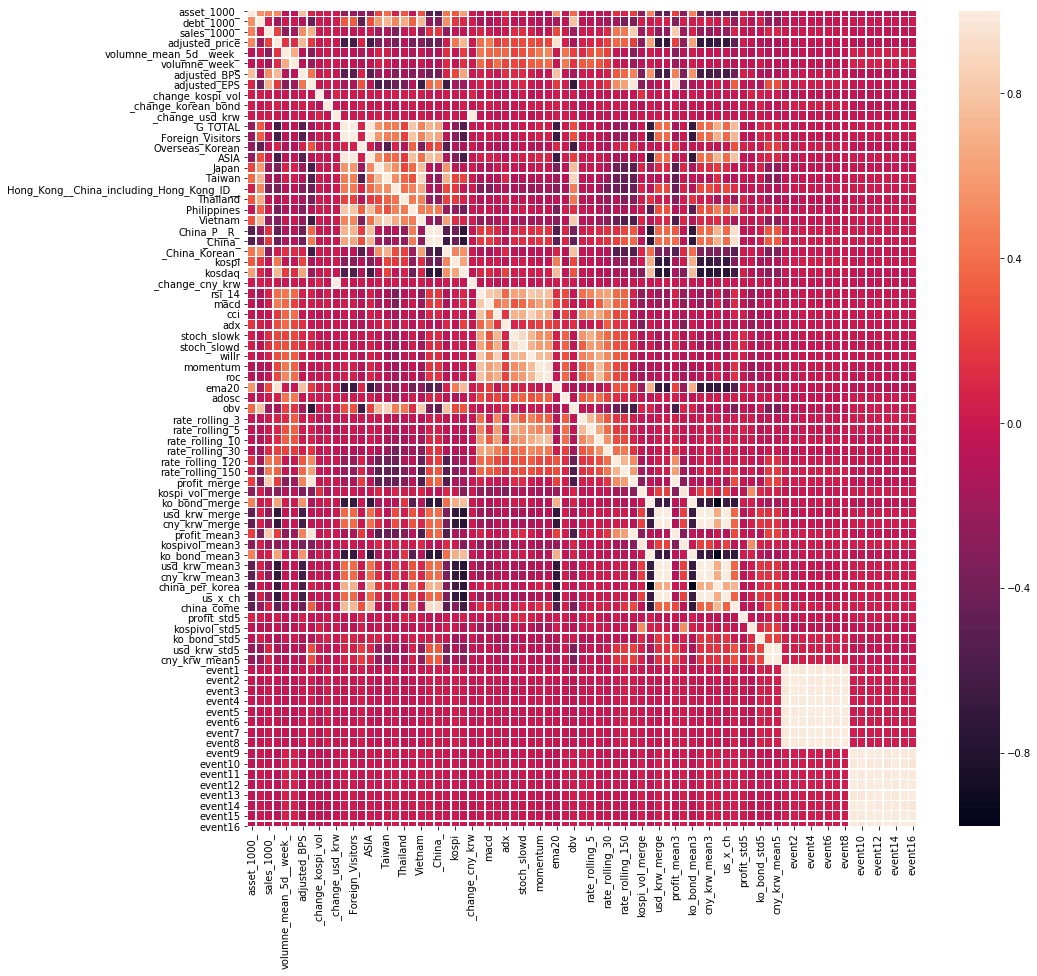

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

In [10]:
data.tail()

,asset_1000_,debt_1000_,sales_1000_,adjusted_price,volumne_mean_5d__week_,volumne_week_,adjusted_BPS,adjusted_EPS,_change_kospi_vol,_change_korean_bond,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-23,81307960.2,46114503.7,29324609.54,11200.0,2368828.0,2021601.0,2190.48,-445.25,6.80,-0.81,...,-0.331894,-0.315463,0.362671,0.368812,0.371296,0.311456,0.267204,0.327438,0.293399,0.280156
2019-12-24,81307960.2,46114503.7,29324609.54,10300.0,2408223.0,1296496.0,2190.48,-445.25,-1.15,-0.82,...,-0.257485,-0.236019,0.522403,0.501331,0.512631,0.475270,0.409992,0.460607,0.444585,0.447698
2019-12-26,81307960.2,46114503.7,29324609.54,10750.0,2606370.0,3727974.0,2190.48,-445.25,2.46,0.68,...,-0.150105,-0.136175,0.255187,0.227207,0.264742,0.202433,0.146519,0.193206,0.176943,0.166644
2019-12-27,81307960.2,46114503.7,29324609.54,10950.0,1948342.0,600689.0,2190.48,-445.25,-0.14,1.02,...,-0.279280,-0.277364,0.282493,0.263181,0.288750,0.235763,0.161813,0.237218,0.220583,0.188504
2019-12-30,81307960.2,46114503.7,29324609.54,10850.0,1618668.0,446581.0,2190.48,-445.25,3.96,-0.27,...,0.186871,0.222315,0.339704,0.294803,0.334775,0.291359,0.228157,0.269727,0.267381,0.257102


In [11]:
# data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)

In [12]:
data.columns

Index(['asset_1000_', 'debt_1000_', 'sales_1000_', 'adjusted_price',
       'volumne_mean_5d__week_', 'volumne_week_', 'adjusted_BPS',
       'adjusted_EPS', '_change_kospi_vol', '_change_korean_bond',
       '_change_usd_krw', 'G_TOTAL', 'Foreign_Visitors', 'Overseas_Korean',
       'ASIA', 'Japan', 'Taiwan', 'Hong_Kong__China_including_Hong_Kong_ID__',
       'Thailand', 'Philippines', 'Vietnam', 'China_P__R_', '_China_',
       '_China_Korean_', 'kospi', 'kosdaq', '_change_cny_krw', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'profit_merge',
       'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge', 'cny_krw_merge',
       'profit_mean3', 'kospivol_mean3', 'ko_bond_mean3', 'usd_krw_mean3',
       'cny_krw_mean3', 'china_per_korea', 'us_x_ch', 'chin

In [13]:
test_data = data['2019':]
# test_data.to_csv('test.csv')

In [14]:
train_data = data[:'2018']
# train_data.to_csv('train.csv') 

In [15]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [16]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [17]:
col = train_data.columns.to_list()

In [18]:
del col[col.index('target')]
del col[col.index('profit_rate')]
# del col[col.index('Date')]

In [19]:
X = train_data[col]
y = train_data['target']

In [20]:
test_X = test_data[col]
test_y = test_data['target']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2019)

In [22]:
date_columns = 'Date'
# train_data[date_columns]

In [23]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [24]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [25]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [26]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [27]:
model_score = dict()

In [28]:
data.columns

Index(['asset_1000_', 'debt_1000_', 'sales_1000_', 'adjusted_price',
       'volumne_mean_5d__week_', 'volumne_week_', 'adjusted_BPS',
       'adjusted_EPS', '_change_kospi_vol', '_change_korean_bond',
       '_change_usd_krw', 'G_TOTAL', 'Foreign_Visitors', 'Overseas_Korean',
       'ASIA', 'Japan', 'Taiwan', 'Hong_Kong__China_including_Hong_Kong_ID__',
       'Thailand', 'Philippines', 'Vietnam', 'China_P__R_', '_China_',
       '_China_Korean_', 'kospi', 'kosdaq', '_change_cny_krw', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'profit_merge',
       'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge', 'cny_krw_merge',
       'profit_mean3', 'kospivol_mean3', 'ko_bond_mean3', 'usd_krw_mean3',
       'cny_krw_mean3', 'china_per_korea', 'us_x_ch', 'chin

In [29]:
# LightGBM
model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', colsample_bytree=1.0,
                            importance_type='split', lambda_l1=0, lambda_l2=1,
                            learning_rate=1, max_depth=-1 , min_child_samples=20,
                            min_child_weight=0.001, min_data_in_leaf=30, min_split_gain=0.0,
                            n_estimators=200, n_jobs=-1, num_leaves=31,
                            objective=None, random_state=42, reg_alpha=0.1, reg_lambda=0.0,
                            silent=True, subsample=1.0, subsample_for_bin=200000,
                            subsample_freq=0)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop('Date', axis=1),y_train, eval_set = (X_val.drop(['Date'], axis=1), y_val))

현재 교차검증 중인 모델 : LGBMClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished
Test Mean Score : 27.45
Fit Time / Each CV : 2.18s
[1]	valid_0's multi_logloss: 1.67665
[2]	valid_0's multi_logloss: 1.76547
[3]	valid_0's multi_logloss: 1.79317
[4]	valid_0's multi_logloss: 1.84442
[5]	valid_0's multi_logloss: 1.8533
[6]	valid_0's multi_logloss: 1.91474
[7]	valid_0's multi_logloss: 1.93502
[8]	valid_0's multi_logloss: 1.98386
[9]	valid_0's multi_logloss: 2.05626
[10]	valid_0's multi_logloss: 2.11511
[11]	valid_0's multi_logloss: 2.15134
[12]	valid_0's multi_logloss: 2.18224
[13]	valid_0's multi_logloss: 2.21781
[14]	valid_0's multi_logloss: 2.24127
[15]	valid_0's multi_logloss: 2.25163
[16]	valid_0's multi_logloss: 2.29819
[17]	valid_0's multi_logloss: 2.32761
[18]	valid_0's multi_logloss: 2.36975
[19]	valid_0's multi_logloss: 2.40734
[20]	valid_0's multi_logloss: 2.41779
[21]	valid_0's multi

LGBMClassifier(class_weight='balanced', lambda_l1=0, lambda_l2=1,
               learning_rate=1, min_data_in_leaf=30, n_estimators=200,
               random_state=42, reg_alpha=0.1)

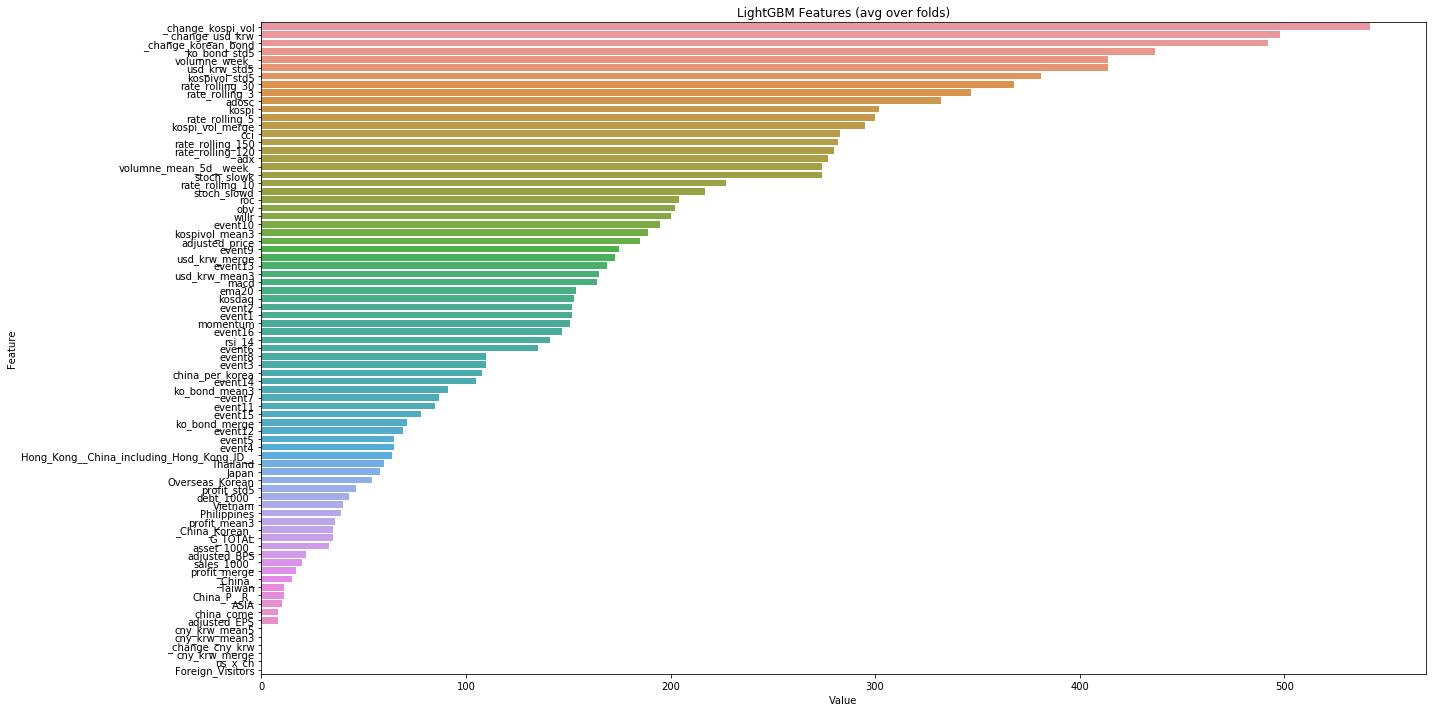

In [30]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [31]:
model = model_lgbm
#cross
# result = pd.DataFrame(model.predict_proba(test_X.values),columns=['d2','d1','hold','u1','u2'])
# profit = pd.DataFrame(test_data.profit_rate.values,columns=['profitrate'])
# _pred = pd.DataFrame(model.predict(test_X.values),columns=['pred'])
# _true = pd.DataFrame(test_data.target.values,columns=['true'])
# test = pd.concat([result,profit,_pred,_true],axis=1)
# test.describe()

#sliding
result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values),columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(test_data.profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values),columns=['pred'])
_true = pd.DataFrame(test_data.target.values,columns=['true'])
test = pd.concat([result,profit,_pred,_true],axis=1)
test.describe()

,d2,d1,hold,u1,u2,profitrate,pred,true
count,246.000000,246.000000,2.460000e+02,246.000000,246.000000,245.000000,246.000000,246.000000
mean,0.311069,0.245009,2.614949e-02,0.262813,0.154959,-0.283293,-0.272358,-0.252033
std,0.337717,0.302523,8.198249e-02,0.297486,0.269192,2.896366,1.504757,1.460184
min,0.000155,0.000053,1.148881e-07,0.000035,0.000011,-14.196429,-2.000000,-2.000000
25%,0.029900,0.009029,2.040703e-04,0.020821,0.002926,-1.574803,-2.000000,-1.000000
50%,0.139223,0.084616,1.524428e-03,0.113139,0.028312,-0.408163,-1.000000,-1.000000
75%,0.559495,0.426434,1.072589e-02,0.487987,0.133424,0.921659,1.000000,1.000000
max,0.998075,0.995632,7.229577e-01,0.994066,0.980952,18.540146,2.000000,2.000000


In [32]:
data = data.reset_index()
profit_rate = data.profit_rate
target= data.target
Date = data.Date
data = data.drop(columns=['Date','profit_rate','target'])

In [33]:
true_false = pd.concat([_pred,_true],axis=1)
# true_false.head()
true_false['ox'] = (true_false.pred==true_false.true)
true_false.head()

,pred,true,ox
0,1,-2,False
1,1,2,False
2,2,-1,False
3,-1,2,False
4,1,1,True


In [34]:
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true  : ",true_false[(true_false.pred==i)&(true_false.ox==True)].shape[0])
    print("   false : ",true_false[(true_false.pred==i)&(true_false.ox==False)].shape[0])

label :  -2
   true  :  21
   false :  51
label :  -1
   true  :  20
   false :  46
label :  0
   true  :  0
   false :  3
label :  1
   true  :  12
   false :  55
label :  2
   true  :  7
   false :  31


In [35]:
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true : ",true_false[(true_false.true==i)&(true_false.ox==True)].shape[0])
    print("   false : ",true_false[(true_false.true==i)&(true_false.ox==False)].shape[0])

label :  -2
   true :  21
   false :  40
label :  -1
   true :  20
   false :  54
label :  0
   true :  0
   false :  20
label :  1
   true :  12
   false :  36
label :  2
   true :  7
   false :  36


In [36]:
result_1 = pd.DataFrame()
result_2 = pd.DataFrame()
result_3 = pd.DataFrame()

In [37]:
def get_pred_from_model(model):
#     result = pd.DataFrame(model.predict_proba(test_X.values), columns=[
#                           'd2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.hold = result.hold
#     normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

#     profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
#     _pred = pd.DataFrame(model.predict(test_X.values), columns=['pred'])
#     _true = pd.DataFrame(test_data.target.values, columns=['true'])
#     test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
#     model.score(test_X.values, test_y)

#     pred = pd.DataFrame(normal_result,
#                         columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     pred['cash'] = 0
#     pred['stock'] = 0
#     pred['adjusted_price'] = test_X['adjusted_price'].values
#     pred['buy_sell']=''

#     if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
#         pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
#         pred.iloc[0, 5] = 0
#     else:
#         pred.iloc[0, 5] = 100000
#         pred.iloc[0, 6] = 0

#     return pred

    result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=[
                          'd2', 'd1', 'hold', 'u1', 'u2'])
    normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
    normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.hold = result.hold
    normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

    profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
    _pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])
    _true = pd.DataFrame(test_data.target.values, columns=['true'])
    test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
    model.score(test_X.drop('Date', axis=1).values, test_y)

    pred = pd.DataFrame(normal_result,
                        columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    pred['cash'] = 0
    pred['stock'] = 0
    pred['adjusted_price'] = test_X['adjusted_price'].values
    pred['buy_sell']=''

    if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
        pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
        pred.iloc[0, 5] = 0
    else:
        pred.iloc[0, 5] = 100000
        pred.iloc[0, 6] = 0

    return pred

In [38]:
def backtest1(model,pred,weight,alone=True):
    df = pred.values

    # 5:cash
    # 6:stock
    # 7:price
    
    
    s = 1
    while s < len(pred.index):
        i = s
        row = df[s, :]
        x_row = df[s-1, :]
        if row[3]+row[4] >= 0.6:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df[i, 6] = buy  # stock
                df[i, 5] = 0  # cash
                df[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df[i, 6] = x_row[6]
                df[i, 5] = 0
                df[i, 8] = 'buy'
        elif row[0]+row[1] >= 0.6: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df[i, 5] = sell  # cash
                df[i, 6] = 0  # stock
                df[i, 8] = 'sell'
            else:  # stock ==0
                df[i, 6] = 0
                df[i, 5] = x_row[5]
                df[i, 8] = 'sell'
        else:
                df[i, 5] = x_row[5]
                df[i, 6] = x_row[6]
                df[i, 8] = 'hold'
        s += 1

    backtest_1 = pd.DataFrame(df, columns=pred.columns)
    backtest_1['value'] = backtest_1['cash'] + \
        (backtest_1['stock']*backtest_1['adjusted_price'])
    result_1 = backtest_1
    if alone:
        backtest_1.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 1st Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest1'))
        plt.show()
    
    return backtest_1

In [39]:
def backtest2(model,pred,weight,alone=True):
    df2 = pred.values

    s = 1
    while s < len(pred.index):
        i = s
        row = df2[s, :]
        x_row = df2[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.00:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df2[i, 6] = buy  # stock
                df2[i, 5] = 0  # cash
                df2[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df2[i, 6] = x_row[6]
                df2[i, 5] = 0
                df2[i, 8] = 'buy'
        else: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df2[i, 5] = sell  # cash
                df2[i, 6] = 0  # stock
                df2[i, 8] = 'sell'
            else:  # stock ==0
                df2[i, 6] = 0
                df2[i, 5] = x_row[5]
                df2[i, 8] = 'sell'
            
        s += 1

    backtest_2 = pd.DataFrame(df2, columns=pred.columns)
    backtest_2['value'] = backtest_2['cash'] + \
        (backtest_2['stock']*backtest_2['adjusted_price'])
    result_2 = backtest_2
    if alone:
        backtest_2.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 2nd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest2'))
        plt.show()
    return backtest_2

In [40]:
def backtest3(model, pred, weight,alone=True):

    df3 = pred.values

    s = 1

    while s < len(pred.index):
        i = s
        row = df3[s, :]
        x_row = df3[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.3:  # bu3
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]) + x_row[6]  # stock
                df3[i, 6] = buy  # stock
                df3[i, 5] = 0  # cash
                df3[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df3[i, 6] = x_row[6]
                df3[i, 5] = 0
                df3[i, 8] = 'buy'
        elif (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) <= -0.3:# sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7])
                df3[i, 5] = sell  # cash
                df3[i, 6] = 0  # stock
                df3[i, 8] = 'sell'
            else:  # stock ==0
                df3[i, 6] = 0
                df3[i, 5] = x_row[5]
                df3[i, 8] = 'sell'
        else:  #hold
                df3[i, 5] = x_row[5]
                df3[i, 6] = x_row[6]
                df3[i, 8] = 'hold'
        s += 1

    backtest_3 = pd.DataFrame(df3, columns=pred.columns)
    backtest_3['value'] = backtest_3['cash'] + \
        (backtest_3['stock']*backtest_3['adjusted_price'])
    result_3 = backtest_3
    result_3['strategy_3_index'] = (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0])
#     result_3.to_csv(('./output/{}_prob.csv'.format(company)))
    if alone:
        model_name = type(model).__name__
        close_ = pd.read_excel(rf"G:\공유 드라이브\Boad ADV Stock\화장품\tech_data\{company}_tech.xlsx", header=5)
        close_.columns = ['Date', '1', '2', '3', 'close', '5']
        close_ = close_.set_index('Date')
        close_ = close_['close']['2019':]
        close_ = close_ * (100000/close_.iloc[0])
        plt.plot(close_.index, backtest_3.value, color = 'red')
        plt.plot(close_.index, close_, color = 'blue')
        plt.title('{} - 3rd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.savefig('./output/상형/{}_{}__with_88_event.png'.format(model_name,company))
        plt.show()
    display(backtest_3)
    return backtest_3

In [41]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품')

----------------------------------------------------------------------------------------------------
LGBMClassifier Score : 0.24390243902439024
----------------------------------------------------------------------------------------------------


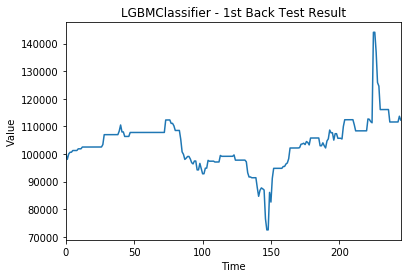

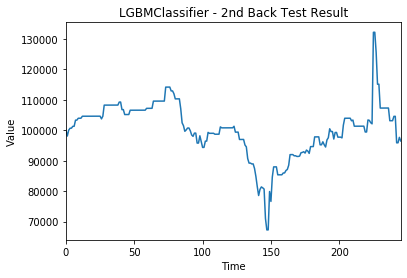

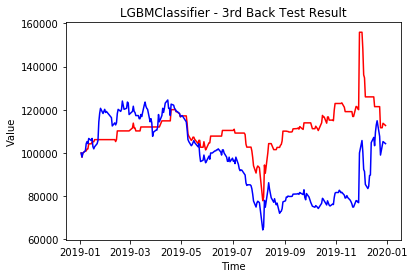

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,strategy_3_index
0,0.000488669,0.00619602,0.000646603,0.963491,0.0298244,0,9.61538,10400,,100000,-2.111875
1,0.000545911,0.000261311,0.00041524,0.550238,0.448954,0,9.61538,10200,buy,98076.9,-2.111875
2,0.0486811,0.317108,0.00102089,0.00213313,0.632078,0,9.61538,10400,buy,100000,-2.111875
3,0.00166147,0.873972,0.000412765,0.0283878,0.0959784,100962,0,10500,sell,100962,-2.111875
4,0.143626,0.0297495,0.00560499,0.798365,0.0282595,0,9.30521,10850,buy,100962,-2.111875
...,...,...,...,...,...,...,...,...,...,...,...
241,0.421113,0.000372967,2.52455e-05,0.57759,0.000923406,0,10.8423,11200,buy,121433,-2.111875
242,0.947528,0.0017128,0.000187925,0.0497807,0.000978488,111675,0,10300,sell,111675,-2.111875
243,0.0538008,0.109429,0.000608909,0.835841,0.000929121,0,10.3884,10750,buy,111675,-2.111875
244,0.0848836,0.120747,0.00158086,0.788807,0.00556176,0,10.3884,10950,buy,113753,-2.111875


In [42]:
model_name = 'LGBMClassifier'
model = model_lgbm
print('-'*100)
# score = model.score(test_X.values,test_y)
score = model.score(test_X.drop('Date', axis=1).values,test_y)
print('{} Score : {}'.format(type(model).__name__,score))
print('-'*100)
pred = get_pred_from_model(model)

mean_w = test.describe().loc['mean'].iloc[0:5]
mean_w
inv_w = 1/mean_w
weight = 10*inv_w/inv_w.drop('hold').sum()

for func in [backtest1,backtest2,backtest3]:
    func(model,pred,weight)

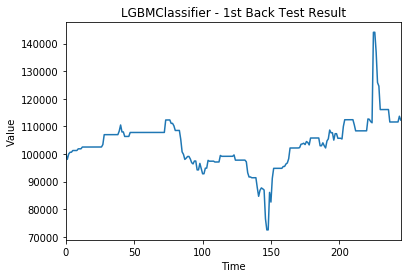

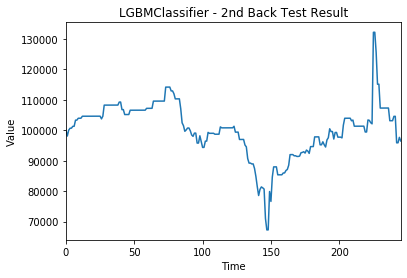

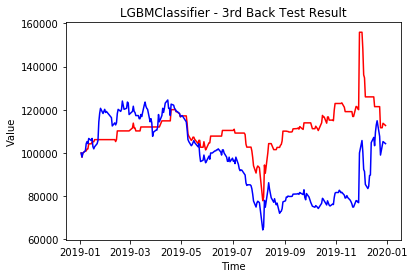

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,strategy_3_index
0,0.000488669,0.00619602,0.000646603,0.963491,0.0298244,0,9.61538,10400,,100000,-2.111875
1,0.000545911,0.000261311,0.00041524,0.550238,0.448954,0,9.61538,10200,buy,98076.9,-2.111875
2,0.0486811,0.317108,0.00102089,0.00213313,0.632078,0,9.61538,10400,buy,100000,-2.111875
3,0.00166147,0.873972,0.000412765,0.0283878,0.0959784,100962,0,10500,sell,100962,-2.111875
4,0.143626,0.0297495,0.00560499,0.798365,0.0282595,0,9.30521,10850,buy,100962,-2.111875
...,...,...,...,...,...,...,...,...,...,...,...
241,0.421113,0.000372967,2.52455e-05,0.57759,0.000923406,0,10.8423,11200,buy,121433,-2.111875
242,0.947528,0.0017128,0.000187925,0.0497807,0.000978488,111675,0,10300,sell,111675,-2.111875
243,0.0538008,0.109429,0.000608909,0.835841,0.000929121,0,10.3884,10750,buy,111675,-2.111875
244,0.0848836,0.120747,0.00158086,0.788807,0.00556176,0,10.3884,10950,buy,113753,-2.111875


In [43]:
result1 = backtest1(model_lgbm, pred, weight)
result2 = backtest2(model_lgbm, pred, weight)
result3 = backtest3(model_lgbm, pred, weight)

In [44]:
result3['tomorrow_pct']=result3['adjusted_price'].pct_change().shift(periods=-1)*100

In [45]:
pd.options.display.max_rows=300

In [46]:
result3[['d2','d1','hold','u1','u2','buy_sell','tomorrow_pct','cash','stock','adjusted_price','value']]

,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,cash,stock,adjusted_price,value
0,0.000488669,0.00619602,0.000646603,0.963491,0.0298244,,-1.923077,0,9.61538,10400,100000
1,0.000545911,0.000261311,0.00041524,0.550238,0.448954,buy,1.960784,0,9.61538,10200,98076.9
2,0.0486811,0.317108,0.00102089,0.00213313,0.632078,buy,0.961538,0,9.61538,10400,100000
3,0.00166147,0.873972,0.000412765,0.0283878,0.0959784,sell,3.333333,100962,0,10500,100962
4,0.143626,0.0297495,0.00560499,0.798365,0.0282595,buy,0.921659,0,9.30521,10850,100962
5,0.961356,0.00621288,3.82923e-05,0.0317023,0.000728682,sell,-0.913242,101892,0,10950,101892
6,0.424436,0.00330296,0.00020955,0.572171,9.05109e-05,buy,2.304147,0,9.39097,10850,101892
7,0.401962,0.570833,0.00365347,0.0267598,0.000444721,sell,-0.900901,104240,0,11100,104240
8,0.224839,0.0933439,0.00378924,0.681291,0.00052597,buy,0.909091,0,9.47635,11000,104240
9,0.713453,0.067288,0.00017219,0.218139,0.00111996,sell,-3.603604,105187,0,11100,105187


In [47]:
check_result = result3[['buy_sell','tomorrow_pct']][1:-1]
check_result.head()

,buy_sell,tomorrow_pct
1,buy,1.960784
2,buy,0.961538
3,sell,3.333333
4,buy,0.921659
5,sell,-0.913242


In [48]:
def convert_pct(x):
    if x > 0:
        return 'buy'
    else:
        return 'sell'

In [49]:
check_result['true'] = check_result['tomorrow_pct'].map(convert_pct)
check_result.head()

,buy_sell,tomorrow_pct,true
1,buy,1.960784,buy
2,buy,0.961538,buy
3,sell,3.333333,buy
4,buy,0.921659,buy
5,sell,-0.913242,sell


In [50]:
len(check_result[check_result.buy_sell==check_result.true])

117

In [51]:
check_result[check_result.buy_sell!=check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

,buy_sell,tomorrow_pct,true
14,sell,8.181818,buy
61,sell,5.150215,buy
145,buy,-11.985019,sell
225,sell,5.769231,buy
226,buy,-5.000000,sell
227,hold,-8.038278,sell
229,buy,-6.519453,sell
232,sell,5.909091,buy
234,sell,16.702355,buy
237,sell,6.046512,buy


In [52]:
check_result[check_result.buy_sell==check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

,buy_sell,tomorrow_pct,true
56,sell,-5.485232,sell
94,sell,-5.069124,sell
148,buy,18.713450,buy
150,buy,10.397946,buy
159,sell,-6.132666,sell
224,buy,29.837703,buy
240,sell,-6.276151,sell


In [53]:
result3['true'] = result3['tomorrow_pct'].map(convert_pct)
result3.head()

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,strategy_3_index,tomorrow_pct,true
0,0.000488669,0.00619602,0.000646603,0.963491,0.0298244,0,9.61538,10400,,100000,-2.111875,-1.923077,sell
1,0.000545911,0.000261311,0.00041524,0.550238,0.448954,0,9.61538,10200,buy,98076.9,-2.111875,1.960784,buy
2,0.0486811,0.317108,0.00102089,0.00213313,0.632078,0,9.61538,10400,buy,100000,-2.111875,0.961538,buy
3,0.00166147,0.873972,0.000412765,0.0283878,0.0959784,100962,0,10500,sell,100962,-2.111875,3.333333,buy
4,0.143626,0.0297495,0.00560499,0.798365,0.0282595,0,9.30521,10850,buy,100962,-2.111875,0.921659,buy


In [54]:
result3[(result3.buy_sell==result3.true)][(result3.tomorrow_pct>5)|(result3.tomorrow_pct<-5)][['d2','d1','hold','u1','u2','buy_sell',
                                                                                                 'tomorrow_pct','true']]

,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,true
56,0.148562,0.839173,0.485288,0.00683262,0.00543237,sell,-5.485232,sell
94,0.131882,0.815389,0.000221199,0.017706,0.0350232,sell,-5.069124,sell
148,0.00787582,0.00161434,0.0495771,0.00142419,0.989086,buy,18.713450,buy
150,0.0365827,0.0180711,0.0145593,0.9417,0.0036461,buy,10.397946,buy
159,0.0837105,0.54143,0.0182087,0.302374,0.0724852,sell,-6.132666,sell
224,0.0380902,0.00473776,3.27874e-05,0.934775,0.0223966,buy,29.837703,buy
240,0.831954,0.0328987,5.96042e-05,0.0571536,0.0779938,sell,-6.276151,sell


In [55]:
result3[(result3.buy_sell!=result3.true)][(result3.tomorrow_pct>5)|(result3.tomorrow_pct<-5)][['d2','d1','hold','u1','u2','buy_sell',
                                                                                                 'tomorrow_pct','true']]

,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,true
14,0.813374,0.00887864,0.00257641,0.175636,0.00211083,sell,8.181818,buy
61,0.00846063,0.990372,1.1192e-05,0.00112051,4.63903e-05,sell,5.150215,buy
145,0.00547379,0.124332,0.000107222,0.530371,0.339823,buy,-11.985019,sell
225,0.881902,0.0111915,0.000504926,0.104821,0.00208525,sell,5.769231,buy
226,0.3271,0.0332349,0.000257777,0.496875,0.14279,buy,-5.000000,sell
227,0.127975,0.407326,0.00146757,0.305781,0.158919,hold,-8.038278,sell
229,0.0139608,0.294877,1.54436e-05,0.690506,0.000656096,buy,-6.519453,sell
232,0.559938,0.345291,0.0014895,0.0317864,0.0629846,sell,5.909091,buy
234,0.865493,0.105246,1.42678e-05,0.0238047,0.00545674,sell,16.702355,buy
237,0.561117,0.0984765,0.00265764,0.310511,0.029895,sell,6.046512,buy


In [56]:
result3[result3.u2>0.9].sort_values(by='tomorrow_pct')

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,strategy_3_index,tomorrow_pct,true
139,0.000452595,0.00238672,0.000322213,0.040464,0.956697,0,11.6321,8420,buy,97942.5,-2.111875,-3.919240,sell
86,0.00958596,0.00812316,0.00111935,0.000239164,0.982052,0,9.84515,10950,buy,107804,-2.111875,-1.826484,sell
144,0.00141148,0.0283166,2.00334e-05,0.0521298,0.918142,0,11.6321,8050,buy,93638.6,-2.111875,-0.496894,sell
219,0.0221113,0.00877033,0.412884,0.00279345,0.966325,0,14.9852,7800,buy,116884,-2.111875,0.000000,sell
87,0.0242201,0.000185463,0.000871934,0.00186757,0.973727,0,9.84515,10750,buy,105835,-2.111875,0.465116,buy
160,0.0113348,0.0382677,0.0137018,0.012565,0.937832,0,13.678,7500,buy,102585,-2.111875,0.933333,buy
187,0.0317375,0.00439386,0.150942,0.00506983,0.958799,0,14.2798,7790,buy,111240,-2.111875,1.026958,buy
162,0.00347471,0.00502431,0.0897353,0.0197454,0.971756,0,13.678,7600,buy,103953,-2.111875,1.578947,buy
97,0.0378891,0.0140649,0.00701816,0.00837411,0.939672,0,10.2152,10050,buy,102663,-2.111875,2.487562,buy
101,0.0229325,0.00272565,4.16889e-05,0.0214814,0.95286,0,10.2152,10000,buy,102152,-2.111875,2.500000,buy


# rl_ port data

In [57]:
result = pd.DataFrame(model.predict_proba(data.values),columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(data.values),columns=['pred'])
_true = pd.DataFrame(target.values,columns=['true'])
port_data = pd.concat([result,profit,_pred,_true],axis=1)
port_data.index = Date
# rl_data.to_csv('rl_data.csv')
port_data.head(10)

,d2,d1,hold,u1,u2,profitrate,pred,true
Date,,,,,,,,
2015-09-01,0.000231,0.000006,0.000004,0.000003,0.999755,6.779661,2,2
2015-09-02,0.926534,0.003442,0.000461,0.001825,0.067738,-1.550388,-2,-1
2015-09-03,0.999121,0.000008,0.000098,0.000012,0.000760,-7.086614,-2,-2
2015-09-04,0.000015,0.000175,0.000025,0.000180,0.999604,2.145923,2,2
2015-09-07,0.023725,0.006633,0.011200,0.013145,0.945296,-6.557377,2,-2
2015-09-08,0.007381,0.652135,0.000020,0.000738,0.339727,2.109705,-1,2
2015-09-09,0.000302,0.000230,0.000008,0.000071,0.999389,2.479339,2,2
2015-09-10,0.999067,0.000281,0.000064,0.000256,0.000332,-2.811245,-2,-2
2015-09-11,0.999223,0.000008,0.000018,0.000056,0.000696,-2.469136,-2,-2


In [58]:
def get_index(df):
    mean_w = test.describe().loc['mean'].iloc[0:5]
    inv_w = 1/mean_w
    weight = 10*inv_w/inv_w.drop('hold').sum()
    strategy_index_3 = (weight.u1*df.u1+weight.u2*df.u2)-(weight.d1*df.d1+weight.d2*df.d2)
    df['index_{}'.format(company)] = strategy_index_3

In [59]:
get_index(port_data)
port_data.head()

,d2,d1,hold,u1,u2,profitrate,pred,true,index_한국화장품
Date,,,,,,,,,
2015-09-01,0.000231,0.000006,0.000004,0.000003,0.999755,6.779661,2,2,3.674831
2015-09-02,0.926534,0.003442,0.000461,0.001825,0.067738,-1.550388,-2,-1,-1.451774
2015-09-03,0.999121,0.000008,0.000098,0.000012,0.000760,-7.086614,-2,-2,-1.826867
2015-09-04,0.000015,0.000175,0.000025,0.000180,0.999604,2.145923,2,2,3.674664
2015-09-07,0.023725,0.006633,0.011200,0.013145,0.945296,-6.557377,2,-2,3.444685


In [60]:
port_data.head(10)

,d2,d1,hold,u1,u2,profitrate,pred,true,index_한국화장품
Date,,,,,,,,,
2015-09-01,0.000231,0.000006,0.000004,0.000003,0.999755,6.779661,2,2,3.674831
2015-09-02,0.926534,0.003442,0.000461,0.001825,0.067738,-1.550388,-2,-1,-1.451774
2015-09-03,0.999121,0.000008,0.000098,0.000012,0.000760,-7.086614,-2,-2,-1.826867
2015-09-04,0.000015,0.000175,0.000025,0.000180,0.999604,2.145923,2,2,3.674664
2015-09-07,0.023725,0.006633,0.011200,0.013145,0.945296,-6.557377,2,-2,3.444685
2015-09-08,0.007381,0.652135,0.000020,0.000738,0.339727,2.109705,-1,2,-0.279263
2015-09-09,0.000302,0.000230,0.000008,0.000071,0.999389,2.479339,2,2,3.672983
2015-09-10,0.999067,0.000281,0.000064,0.000256,0.000332,-2.811245,-2,-2,-1.828448
2015-09-11,0.999223,0.000008,0.000018,0.000056,0.000696,-2.469136,-2,-2,-1.827193


In [61]:
port_data.to_csv(('./output/{}_prob.csv'.format(company)))

In [62]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품\tech_data')

tech_data = pd.read_excel('{}_tech.xlsx'.format(company))
tech_data = tech_data[5:]
tech_data.columns = ['Date','open','high','low','close','volume']
# tech_data['profit_rate'] = (tech_data['close'] - tech_data['open'])/tech_data['open']*100
# tech_data.profit_rate = tech_data.profit_rate.shift(-1)
tech_data.Date = pd.to_datetime(tech_data.Date)
tech_data.set_index('Date',inplace=True)

In [63]:
rl_all_feature = data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(rl_all_feature)
# print(fitted.data_max_)

output = min_max_scaler.transform(rl_all_feature)
rl_all_feature = pd.DataFrame(output, columns=rl_all_feature.columns, index=Date)
# print(rl_all_feature.head())

In [64]:
# rl_all_feature.rsi_14

In [65]:
rl_all_feature.columns

Index(['asset_1000_', 'debt_1000_', 'sales_1000_', 'adjusted_price',
       'volumne_mean_5d__week_', 'volumne_week_', 'adjusted_BPS',
       'adjusted_EPS', '_change_kospi_vol', '_change_korean_bond',
       '_change_usd_krw', 'G_TOTAL', 'Foreign_Visitors', 'Overseas_Korean',
       'ASIA', 'Japan', 'Taiwan', 'Hong_Kong__China_including_Hong_Kong_ID__',
       'Thailand', 'Philippines', 'Vietnam', 'China_P__R_', '_China_',
       '_China_Korean_', 'kospi', 'kosdaq', '_change_cny_krw', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'rate_rolling_3', 'rate_rolling_5',
       'rate_rolling_10', 'rate_rolling_30', 'rate_rolling_120',
       'rate_rolling_150', 'profit_merge', 'kospi_vol_merge', 'ko_bond_merge',
       'usd_krw_merge', 'cny_krw_merge', 'profit_mean3', 'kospivol_mean3',
       'ko_bond_mean3', 'usd_krw_mean3', 'cny_krw_mean3', 'china_per_korea',
       'us_x_ch', 'china_come', 'profit_std5', '

In [66]:


# tech_data.head()

# rl_all_feature.loc[:,"rsi_14":'obv'].head()

# roller = rl_all_feature.profit_rate.rolling(10)
# vol_list = roller.std(ddof=0)
# rl_all_feature['volatilty_10']= vol_list

roller = port_data.profitrate.rolling(10)
vol_list = roller.std(ddof=0)
port_data['volatility_10'] = vol_list

rl_feature_2 = pd.merge(port_data,tech_data, how='left', left_index=True, right_index=True)
rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature[['%change_usd_krw','%change_cny_krw']], how='left', left_index=True, right_index=True)
rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature.loc[:,"rsi_14":'obv'], how='left', left_index=True, right_index=True)

# rl_feature_2.head(20)

# rl_feature_2.columns

os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품')
rl_feature_2.to_csv('./output/rl_feature_{}.csv'.format(company))

KeyError: "None of [Index(['%change_usd_krw', '%change_cny_krw'], dtype='object')] are in the [columns]"